In [19]:
# Import the libraries
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.model_selection import train_test_split
import shutil

# Create a new directory for the images
base_dir = "C:/Users/HP/Documents/LJMU/DL9"
os.mkdir(base_dir)

# Training file directory
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# Validation file directory
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

# Create new folders in the training directory for each of the classes
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)

# Create new folders in the validation directory for each of the classes
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

# Read the metadata
df = pd.read_csv(r"C:/Users/HP/Documents/LJMU/Research Proposal/Dataset/final_31052022.csv")

# Display some information in the dataset
df.head()

# Set y as the labels
y = df['dx']

# Split the metadata into training and validation
df_train, df_val = train_test_split(df, test_size=0.30, random_state=18, stratify=y)

# Print the shape of the training and validation split
print(df_train.shape)
print(df_val.shape)

# Find the number of values in the training and validation set
df_train['dx'].value_counts()
df_val['dx'].value_counts()

# Transfer the images into folders
# Set the image id as the index
df.set_index('image_id', inplace=True)

# # Get a list of images in each of the two folders
# folder_1 = os.listdir('ham10000_images_part_1')
# folder_2 = os.listdir('ham10000_images_part_2')

# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])

# Transfer the training images
for image in train_list:

    fname = image + '.jpg'
    label = df.loc[image, 'dx']

   
    # source path to image
    basesrc = "C:/Users/HP/Documents/LJMU/Research Proposal/Dataset/images_conbri_31052022"
    src = os.path.join(basesrc, fname)
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the validation images
for image in val_list:

    fname = image + '.jpg'
    label = df.loc[image, 'dx']


    # source path to image
    basesrc = "C:/Users/HP/Documents/LJMU/Research Proposal/Dataset/images_conbri_31052022"
    src =  os.path.join(basesrc, fname)
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)




(2858, 8)
(1226, 8)


In [20]:
# Check how many training images are in each folder
print(len(os.listdir(str(base_dir)+"/train_dir/nv")))
print(len(os.listdir(str(base_dir)+"/train_dir/mel")))
print(len(os.listdir(str(base_dir)+"/train_dir/bkl")))
print(len(os.listdir(str(base_dir)+"/train_dir/bcc")))
print(len(os.listdir(str(base_dir)+"/train_dir/akiec")))
print(len(os.listdir(str(base_dir)+"/train_dir/vasc")))
print(len(os.listdir(str(base_dir)+"/train_dir/df")))

# Check how many validation images are in each folder
print(len(os.listdir(str(base_dir)+"/val_dir/nv")))
print(len(os.listdir(str(base_dir)+"/val_dir/mel")))
print(len(os.listdir(str(base_dir)+"/val_dir/bkl")))
print(len(os.listdir(str(base_dir)+"/val_dir/bcc")))
print(len(os.listdir(str(base_dir)+"/val_dir/akiec")))
print(len(os.listdir(str(base_dir)+"/val_dir/vasc")))
print(len(os.listdir(str(base_dir)+"/val_dir/df")))


# Augment the data
# Class 'nv' is not going to be augmented
class_list = ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

for item in class_list:

    # Create a temporary directory for the augmented images
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)

    # Create a directory within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # List all the images in the directory
    img_list = os.listdir(str(base_dir)+'/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir
    for fname in img_list:
        # source path to image
        src = os.path.join(str(base_dir)+'/train_dir/' + img_class, fname)
        # destination path to image
        dst = os.path.join(img_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    # point to a dir containing the images and not to the images themselves
    path = "C:/Users/HP/Documents/LJMU/Research Proposal/Code/aug_dir"
    save_path = str(base_dir)+'/train_dir/' + img_class

    # Create a data generator to augment the images in real time
    datagen = ImageDataGenerator(
        rotation_range=270,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=(0,0.3),
        shear_range=0.2,
        channel_shift_range=9,
        zca_whitening=True,
        fill_mode='constant')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                              save_to_dir=save_path,
                                              save_format='jpg',
                                              target_size=(224, 224),
                                              batch_size=batch_size)

    # Generate the augmented images and add them to the training folders
    num_aug_images_wanted = 2000  # total number of images we want to have in each class
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted - num_files) / batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0, num_batches):
        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')
    
for item in class_list:

    # Create a temporary directory for the augmented images
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)

    # Create a directory within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # List all the images in the directory
    img_list = os.listdir(str(base_dir)+'/val_dir/' + img_class)

    # Copy images from the class train dir to the img_dir
    for fname in img_list:
        # source path to image
        src = os.path.join(str(base_dir)+'/val_dir/' + img_class, fname)
        # destination path to image
        dst = os.path.join(img_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    # point to a dir containing the images and not to the images themselves
    path = "C:/Users/HP/Documents/LJMU/Research Proposal/Code/aug_dir"
    save_path = str(base_dir)+'/val_dir/' + img_class

    # Create a data generator to augment the images in real time
    datagen = ImageDataGenerator(
        rotation_range=270,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=(0,0.3),
        shear_range=0.2,
        channel_shift_range=9,
        zca_whitening=True,
        fill_mode='constant')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                              save_to_dir=save_path,
                                              save_format='jpg',
                                              target_size=(224, 224),
                                              batch_size=batch_size)

    # Generate the augmented images and add them to the training folders
    num_aug_images_wanted = 500  # total number of images we want to have in each class
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted - num_files) / batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0, num_batches):
        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

# Check how many training images are in each folder
print(len(os.listdir(str(base_dir)+"/train_dir/nv")))
print(len(os.listdir(str(base_dir)+"/train_dir/mel")))
print(len(os.listdir(str(base_dir)+"/train_dir/bkl")))
print(len(os.listdir(str(base_dir)+"/train_dir/bcc")))
print(len(os.listdir(str(base_dir)+"/train_dir/akiec")))
print(len(os.listdir(str(base_dir)+"/train_dir/vasc")))
print(len(os.listdir(str(base_dir)+"/train_dir/df")))

# Check how many validation images are in each folder
print(len(os.listdir(str(base_dir)+"/val_dir/nv")))
print(len(os.listdir(str(base_dir)+"/val_dir/mel")))
print(len(os.listdir(str(base_dir)+"/val_dir/bkl")))
print(len(os.listdir(str(base_dir)+"/val_dir/bcc")))
print(len(os.listdir(str(base_dir)+"/val_dir/akiec")))
print(len(os.listdir(str(base_dir)+"/val_dir/vasc")))
print(len(os.listdir(str(base_dir)+"/val_dir/df")))


700
700
700
350
229
99
80
300
300
300
150
98
43
35


C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 700 images belonging to 1 classes.


C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Found 700 images belonging to 1 classes.
Found 700 images belonging to 1 classes.
Found 350 images belonging to 1 classes.
Found 229 images belonging to 1 classes.
Found 99 images belonging to 1 classes.
Found 80 images belonging to 1 classes.
Found 300 images belonging to 1 classes.
Found 300 images belonging to 1 classes.
Found 300 images belonging to 1 classes.
Found 150 images belonging to 1 classes.
Found 98 images belonging to 1 classes.
Found 43 images belonging to 1 classes.
Found 35 images belonging to 1 classes.
2000
2000
2000
2000
1882
2030
1650
500
500
500
500
540
473
385


In [21]:
import os, glob
from PIL import Image
import cv2
import numpy as np
from os import listdir


base_dir = "C:/Users/HP/Documents/LJMU/DL9"


train_folder_list = [str(base_dir)+"/train_dir/nv",str(base_dir)+"/train_dir/mel",str(base_dir)+"/train_dir/bkl",
                     str(base_dir)+"/train_dir/bcc", str(base_dir)+"/train_dir/akiec", str(base_dir)+"/train_dir/vasc",
                     str(base_dir)+"/train_dir/df"]
val_folder_list = [str(base_dir)+"/val_dir/nv",str(base_dir)+"/val_dir/mel",str(base_dir)+"/val_dir/bkl",
                     str(base_dir)+"/val_dir/bcc", str(base_dir)+"/val_dir/akiec", str(base_dir)+"/val_dir/vasc",
                     str(base_dir)+"/val_dir/df"]

def CleanUp_images():
    for file_path in train_folder_list:
        for filename in glob.glob(file_path+'/*.jpg'):
            img = cv2.imread(filename)
            pix = np.argwhere(img != 0)
            if len(pix) == 0:
                os.remove(filename)
                print(filename)
    for file_path in val_folder_list:
        for filename in glob.glob(file_path+'/*.jpg'):
            img = cv2.imread(filename)
            pix = np.argwhere(img != 0)
            if len(pix) == 0:
                os.remove(filename)
                print(filename)

CleanUp_images()


C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_194_3652033.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_1_9266643.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_211_7344698.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_25_9883025.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_274_9191534.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_290_5165580.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_302_8985705.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_357_8609614.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_490_4411120.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_502_9321918.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_583_3755302.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_644_3552998.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_677_7828882.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_688_8231688.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_697_5591512.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/nv\_698_1517454.jpg
C:/Users/HP/Documents/LJMU/

C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_44_6855453.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_46_3324065.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_49_3628506.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_54_7935072.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_58_9675380.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_60_9930939.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_67_298358.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_68_4144504.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_6_8233697.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_77_6061269.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_79_6422328.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_7_9006246.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_7_971257.jpg
C:/Users/HP/Documents/LJMU/DL9/train_dir/df\_9_5736925.jpg
C:/Users/HP/Documents/LJMU/DL9/val_dir/nv\_148_6810882.jpg
C:/Users/HP/Documents/LJMU/DL9/val_dir/nv\_296_5935982.jpg
C:/Users/HP/Documents/LJMU/DL9/val_dir/mel\_134_

In [1]:
# Import the libraries
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D, GlobalMaxPooling2D, Flatten
from tensorflow.keras.applications import MobileNetV3Large, MobileNetV3Small, mobilenet_v3
from keras.models import Sequential
from cutmix_keras import CutMixImageDataGenerator


In [2]:
inp_train_gen = ImageDataGenerator()
base_dir = "C:/Users/HP/Documents/LJMU/DL2"
train_path = str(base_dir)+'/train_dir'

train_generator1 = inp_train_gen.flow_from_directory(train_path,target_size=[224,224],batch_size=100)

train_generator2 = inp_train_gen.flow_from_directory(train_path,target_size=[224,224],batch_size=100)

traindata = CutMixImageDataGenerator(
    generator1=train_generator1,
    generator2=train_generator2,
    img_size=224,
    batch_size=100,
) 

Found 38702 images belonging to 7 classes.
Found 38702 images belonging to 7 classes.


In [3]:

# The paths for the training and validation images
base_dir = "C:/Users/HP/Documents/LJMU/DL2"
train_path = str(base_dir)+'/train_dir'
valid_path = str(base_dir)+'/val_dir'

# traindata = ImageDataGenerator().flow_from_directory(train_path,target_size=[224,224],batch_size=100)
validationdata = ImageDataGenerator().flow_from_directory(valid_path,target_size=[224,224],batch_size=100)

Found 1002 images belonging to 7 classes.


In [4]:
orig_model = tf.keras.applications.MobileNetV3Small(weights="imagenet",include_top=False,input_shape=(224,224,3))
# omodel = orig_model.layers[-6].output
omodel = orig_model.output
omodel = GlobalMaxPooling2D()(omodel)
omodel = Dropout(0.5)(omodel)
# omodel = (Dense(512,activation="relu"))(omodel)
# omodel = (Dense(256,activation="relu"))(omodel)
omodel = (Dense(512,activation="relu",kernel_regularizer=keras.regularizers.l2(0.5)))(omodel)
omodel = Dropout(0.5)(omodel)
pmodel = (Dense(7,activation="softmax"))(omodel)

In [5]:
model = Model(inputs=orig_model.input,outputs=pmodel )

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

 expanded_conv_1/depthwise/Batc  (None, 28, 28, 72)  288         ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, 28, 28, 72)   0           ['expanded_conv_1/depthwise/Batch
                                                                 Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, 28, 28, 24)  1728        ['re_lu_4[0][0]']                
 D)                                                                                               
                                                                                                  
 expanded_conv_1/project/BatchN  (None, 28, 28, 24)  96          ['expanded_conv_1/project[0][0]']
 orm (Batc

                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    2400        ['expanded_conv_3/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__oper

                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 14, 14, 240)  0          ['multiply_4[0][0]',             
 /Mul (Multiply)                                                  'tf.math.multiply_7[0][0]']     
                                                                                                  
 expanded_conv_4/project (Conv2  (None, 14, 14, 40)  9600        ['expanded_conv_4/squeeze_excite/
 D)                                                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_4/project/BatchN  (None, 14, 14, 40)  160         ['expanded_conv_4/project[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 expanded_

                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, 14, 14, 120)  4800       ['expanded_conv_5/Add[0][0]']    
 )                                                                                                
                                                                                                  
 expanded_conv_6/expand/BatchNo  (None, 14, 14, 120)  480        ['expanded_conv_6/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
                                                                                                  
 tf.__operators__.add_11 (TFOpL  (None, 14, 14, 120)  0          ['expanded_conv_6/expand/BatchNor
 ambda)                                                          m[0][0]']                        
          

                                                                 m[0][0]',                        
                                                                  'tf.math.multiply_14[0][0]']    
                                                                                                  
 expanded_conv_7/depthwise (Dep  (None, 14, 14, 144)  3600       ['multiply_9[0][0]']             
 thwiseConv2D)                                                                                    
                                                                                                  
 expanded_conv_7/depthwise/Batc  (None, 14, 14, 144)  576        ['expanded_conv_7/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 tf.__operators__.add_15 (TFOpL  (None, 14, 14, 144)  0          ['expanded_conv_7/depthwise/Batch
 ambda)   

 tf.__operators__.add_18 (TFOpL  (None, 7, 7, 288)   0           ['expanded_conv_8/depthwise/Batch
 ambda)                                                          Norm[0][0]']                     
                                                                                                  
 re_lu_23 (ReLU)                (None, 7, 7, 288)    0           ['tf.__operators__.add_18[0][0]']
                                                                                                  
 tf.math.multiply_18 (TFOpLambd  (None, 7, 7, 288)   0           ['re_lu_23[0][0]']               
 a)                                                                                               
                                                                                                  
 multiply_12 (Multiply)         (None, 7, 7, 288)    0           ['expanded_conv_8/depthwise/Batch
                                                                 Norm[0][0]',                     
          

 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 144)   0           ['expanded_conv_9/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 576)   83520       ['expanded_conv_9/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__operators__.add_22 (TFOpL  (None, 1, 1, 576)   0           ['expanded_conv_9/squeeze_excite/
 ambda)                                                          Conv_1[0][0]']                   
          

                                                                                                  
 tf.math.multiply_25 (TFOpLambd  (None, 1, 1, 576)   0           ['re_lu_30[0][0]']               
 a)                                                                                               
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 7, 7, 576)   0           ['multiply_16[0][0]',            
 e/Mul (Multiply)                                                 'tf.math.multiply_25[0][0]']    
                                                                                                  
 expanded_conv_10/project (Conv  (None, 7, 7, 96)    55296       ['expanded_conv_10/squeeze_excite
 2D)                                                             /Mul[0][0]']                     
                                                                                                  
 expanded_

In [6]:
len(model.layers)

234

In [11]:
from numpy.random import seed
seed(2)
tf.random.set_seed(2) 

for layer in model.layers[:-50]:
    layer.trainable = False
    
epochs = 30

class_weights={
    0: 1.1,  # akiec
    1: 1.1,  # bcc
    2: 1.0,  # bkl
    3: 1.1,  # df
    4: 1.2,  # mel
    5: 1.0,  # nv
    6: 1.0,  # vasc
}

model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=(['categorical_accuracy'], tf.metrics.AUC()))

model_name = "05062022-03"

filepath = "E:/Models/"+str(model_name)+"/"+model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, cooldown=1, min_lr=0.0000001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

history = model.fit(traindata,
                    validation_data=validationdata,
                    epochs=epochs,
                    class_weight=class_weights,
                    callbacks=callbacks_list,
                    steps_per_epoch=traindata.get_steps_per_epoch())

Epoch 1/30
388/388 [==============================] - ETA: 0s - loss: 2.2693 - categorical_accuracy: 0.5441 - auc: 0.7510
Epoch 1: saving model to E:/Models/05062022-03\05062022-03model-00001-2.26926-0.54405-1.92936-0.69062.h5
388/388 [==============================] - 1604s 4s/step - loss: 2.2693 - categorical_accuracy: 0.5441 - auc: 0.7510 - val_loss: 1.9294 - val_categorical_accuracy: 0.6906 - val_auc: 0.9076 - lr: 0.0100
Epoch 2/30
388/388 [==============================] - ETA: 0s - loss: 2.0314 - categorical_accuracy: 0.5578 - auc: 0.7547
Epoch 2: saving model to E:/Models/05062022-03\05062022-03model-00002-2.03139-0.55783-1.67513-0.58683.h5
388/388 [==============================] - 1444s 4s/step - loss: 2.0314 - categorical_accuracy: 0.5578 - auc: 0.7547 - val_loss: 1.6751 - val_categorical_accuracy: 0.5868 - val_auc: 0.8906 - lr: 0.0100
Epoch 3/30
388/388 [==============================] - ETA: 0s - loss: 1.9760 - categorical_accuracy: 0.5650 - auc: 0.7554
Epoch 3: saving mode

388/388 [==============================] - ETA: 0s - loss: 1.3177 - categorical_accuracy: 0.6529 - auc: 0.8004
Epoch 19: saving model to E:/Models/05062022-03\05062022-03model-00019-1.31766-0.65289-0.63251-0.79341.h5
388/388 [==============================] - 770s 2s/step - loss: 1.3177 - categorical_accuracy: 0.6529 - auc: 0.8004 - val_loss: 0.6325 - val_categorical_accuracy: 0.7934 - val_auc: 0.9727 - lr: 1.0000e-05
Epoch 20/30
388/388 [==============================] - ETA: 0s - loss: 1.3181 - categorical_accuracy: 0.6491 - auc: 0.8018
Epoch 20: saving model to E:/Models/05062022-03\05062022-03model-00020-1.31805-0.64914-0.62841-0.79042.h5
388/388 [==============================] - 767s 2s/step - loss: 1.3181 - categorical_accuracy: 0.6491 - auc: 0.8018 - val_loss: 0.6284 - val_categorical_accuracy: 0.7904 - val_auc: 0.9726 - lr: 1.0000e-05
Epoch 21/30
388/388 [==============================] - ETA: 0s - loss: 1.3185 - categorical_accuracy: 0.6544 - auc: 0.8002
Epoch 21: saving mode

In [12]:
def modelplot(history):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
    axes[0,0].plot(history.history['loss'])   
    axes[0,0].plot(history.history['val_loss'])
    axes[0,0].legend(['loss','val_loss'])
    axes[0,0].set_title('Model Loss')

    axes[0,1].plot(history.history['categorical_accuracy'])   
    axes[0,1].plot(history.history['val_categorical_accuracy'])
    axes[0,1].legend(['categorical_accuracy','val_categorical_accuracy'])
    axes[0,1].set_title('Model Accuracy')
    
    axes[1,0].plot(history.history['auc'])   
    axes[1,0].plot(history.history['val_auc'])
    axes[1,0].legend(['auc','val_auc'])
    axes[1,0].set_title('Model auc')
    
#     axes[1,1].plot(history.history['recall_2'])   
#     axes[1,1].plot(history.history['val_recall_2'])
#     axes[1,1].legend(['recall','val_recall'])
#     axes[1,1].set_title('Model Recall')

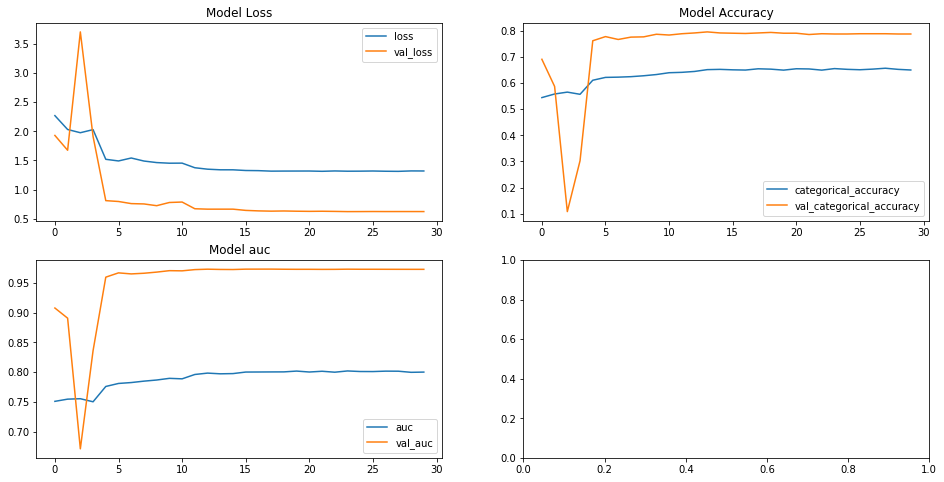

In [13]:
modelplot(history)

In [22]:
from sklearn.metrics import classification_report
from keras.models import load_model

base_dir1 = "C:/Users/HP/Documents/LJMU/DL9"
train_path1 = str(base_dir1)+'/train_folder'
valid_path1 = str(base_dir1)+'/test_folder'

validationdata1 = ImageDataGenerator().flow_from_directory(train_path1,target_size=[224,224],batch_size=100,shuffle=False)


model = load_model('E:/Models/04062022-03/04062022-03model-00026-1.32078-0.63105-0.63404-0.78044.h5')
model1 = load_model('E:/Models/04062022-02/04062022-02model-00030-1.29494-0.64726-0.88653-0.71106.h5')
model2 = load_model('E:/Models/05062022-03/05062022-03model-00021-1.31850-0.65438-0.62601-0.79042.h5')


test_labels = validationdata1.classes

pred = model1.predict(validationdata1)

# predicted = np.argmax(pred, axis=1)
# report = classification_report(np.argmax(validationdata, axis=1), predicted)
# print(report)

Found 13415 images belonging to 7 classes.


In [23]:
from sklearn import metrics

val_preds = np.argmax(pred, axis=-1)
val_trues = test_labels
cm = metrics.confusion_matrix(val_trues, val_preds)

print(classification_report(val_trues, val_preds, labels=[0, 1, 2, 3, 4, 5, 6]))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1852
           1       0.79      0.84      0.82      1983
           2       0.75      0.68      0.71      1985
           3       0.89      0.96      0.92      1624
           4       0.75      0.71      0.73      1978
           5       0.84      0.80      0.82      1983
           6       0.99      0.99      0.99      2010

    accuracy                           0.82     13415
   macro avg       0.82      0.83      0.82     13415
weighted avg       0.82      0.82      0.82     13415



Confusion matrix, without normalization
[[1496  200   78   31   33   14    0]
 [ 142 1668   33  100    8   24    8]
 [ 201   97 1356   22  213   95    1]
 [   3   49    5 1559    0    6    2]
 [ 112   28  245   12 1404  169    8]
 [  23   48   93   18  207 1586    8]
 [   0   15    0    9    0    2 1984]]


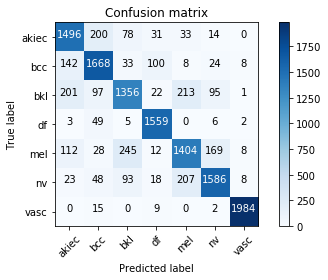

In [24]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# cm = confusion_matrix(test_labels, pred.argmax(axis=1))

cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels)

Normalized confusion matrix
[[8.07775378e-01 1.07991361e-01 4.21166307e-02 1.67386609e-02
  1.78185745e-02 7.55939525e-03 0.00000000e+00]
 [7.16086737e-02 8.41149773e-01 1.66414523e-02 5.04286435e-02
  4.03429148e-03 1.21028744e-02 4.03429148e-03]
 [1.01259446e-01 4.88664987e-02 6.83123426e-01 1.10831234e-02
  1.07304786e-01 4.78589421e-02 5.03778338e-04]
 [1.84729064e-03 3.01724138e-02 3.07881773e-03 9.59975369e-01
  0.00000000e+00 3.69458128e-03 1.23152709e-03]
 [5.66228514e-02 1.41557128e-02 1.23862487e-01 6.06673407e-03
  7.09807887e-01 8.54398382e-02 4.04448938e-03]
 [1.15985880e-02 2.42057489e-02 4.68986384e-02 9.07715582e-03
  1.04387292e-01 7.99798285e-01 4.03429148e-03]
 [0.00000000e+00 7.46268657e-03 0.00000000e+00 4.47761194e-03
  0.00000000e+00 9.95024876e-04 9.87064677e-01]]


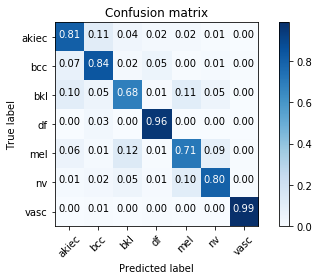

In [25]:
plot_confusion_matrix(cm, cm_plot_labels,normalize=True)

In [33]:
from sklearn.metrics import classification_report
from keras.models import load_model

base_dir1 = "C:/Users/HP/Documents/LJMU/DL3"
train_path1 = str(base_dir1)+'/train_dir'
valid_path1 = str(base_dir1)+'/val_dir'

validationdata1 = ImageDataGenerator().flow_from_directory(train_path1,target_size=[224,224],batch_size=100,shuffle=False)


model = load_model('E:/Models/04062022-03/04062022-03model-00026-1.32078-0.63105-0.63404-0.78044.h5')
model1 = load_model('E:/Models/04062022-02/04062022-02model-00030-1.29494-0.64726-0.88653-0.71106.h5')
model2 = load_model('E:/Models/05062022-03/05062022-03model-00021-1.31850-0.65438-0.62601-0.79042.h5')


test_labels = validationdata1.classes

pred = model.predict(validationdata1)

# predicted = np.argmax(pred, axis=1)
# report = classification_report(np.argmax(validationdata, axis=1), predicted)
# print(report)

Found 38324 images belonging to 7 classes.


In [34]:

from sklearn import metrics

val_preds = np.argmax(pred, axis=-1)
val_trues = test_labels
cm = metrics.confusion_matrix(val_trues, val_preds)

print(classification_report(val_trues, val_preds, labels=[0, 1, 2, 3, 4, 5, 6]))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      5546
           1       0.74      0.84      0.79      5450
           2       0.66      0.28      0.39      5833
           3       0.84      0.90      0.87      4910
           4       0.61      0.72      0.66      5903
           5       0.82      0.97      0.89      4692
           6       0.96      0.97      0.97      5990

    accuracy                           0.77     38324
   macro avg       0.76      0.77      0.76     38324
weighted avg       0.76      0.77      0.75     38324



Confusion matrix, without normalization
[[4107  587  330  214  274   23   11]
 [ 394 4605   54  130  129   55   83]
 [ 885  460 1627  296 2146  380   39]
 [ 174  180    7 4424   88   36    1]
 [ 283  237  428  156 4228  457  114]
 [   6   38   29    4   65 4544    6]
 [   0  122    0   15    6   20 5827]]


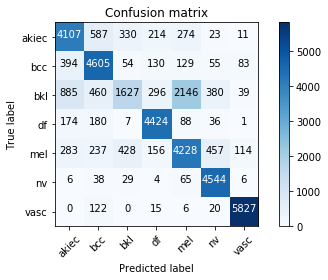

In [35]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# cm = confusion_matrix(test_labels, pred.argmax(axis=1))

cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels)

Normalized confusion matrix
[[7.40533718e-01 1.05842048e-01 5.95023440e-02 3.85863686e-02
  4.94049766e-02 4.14713307e-03 1.98341147e-03]
 [7.22935780e-02 8.44954128e-01 9.90825688e-03 2.38532110e-02
  2.36697248e-02 1.00917431e-02 1.52293578e-02]
 [1.51722956e-01 7.88616492e-02 2.78930225e-01 5.07457569e-02
  3.67906738e-01 6.51465798e-02 6.68609635e-03]
 [3.54378819e-02 3.66598778e-02 1.42566191e-03 9.01018330e-01
  1.79226069e-02 7.33197556e-03 2.03665988e-04]
 [4.79417245e-02 4.01490767e-02 7.25055057e-02 2.64272404e-02
  7.16245977e-01 7.74182619e-02 1.93122141e-02]
 [1.27877238e-03 8.09889173e-03 6.18073316e-03 8.52514919e-04
  1.38533674e-02 9.68456948e-01 1.27877238e-03]
 [0.00000000e+00 2.03672788e-02 0.00000000e+00 2.50417362e-03
  1.00166945e-03 3.33889816e-03 9.72787980e-01]]


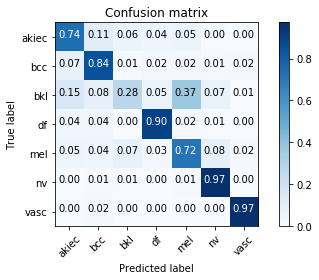

In [36]:
plot_confusion_matrix(cm, cm_plot_labels,normalize=True)